# Debugging and visualizing data

In [1]:
import argparse
import numpy as np
import matplotlib.pyplot as plt

from popularity import PopularityRecommender
from content import ContentFiltering
from main import rec_dict, rec_args, debug_opt
from debug import Debug

### A few details on the available debugging options
- `MEASUREMENTS` is used to debug the `measurements` module. Right now, if enabled, it only supports plotting the distribution of interactions at a given timestep. It is possible to define a `measurement_visualization_rule` to plot the distribution -- see example below.
- `USER_SCORES` is used to debug the `user_scores` module. If enabled, it plots the distribution of the most liked items at the beginning of the execution.
- `RECOMMENDER` is used to debug the behavior of the recommender system.

In [2]:
# NOTE: Restart kernel before re-running this

# Set up debug options (see debug_opt in main.py)
debug_opt['MEASUREMENTS'] = False # debug measurement of equilibrium
debug_opt['USER_SCORES'] = True  # debug user preferences
debug_opt['RECOMMENDER'] = True # debug recommender system
# Configure and initialize debugger
debugger = Debug(list(debug_opt.keys()), list(debug_opt.values()))

USER_SCORES - Debugging module inizialized
RECOMMENDER - Debugging module inizialized


### Set up recommender system
This cell contains everything needed for setup.

In [3]:
# Set up the following
RECSYS_TYPE = 'content' # choose from supported (see rec_dict in main.py)
NUM_USERS = 5
NUM_ITEMS_PER_ITER = 2  # num items presented to each user at each iteration
STARTUP_TIMESTEPS = 2  # num iterations of 'exploration'
RUN_TIMESTEPS = 3  # total num iterations
NUM_ITEMS = 10 #round((STARTUP_TIMESTEPS + RUN_TIMESTEPS) * NUM_ITEMS_PER_ITER * np.random.uniform(1, 5))  # total num items in simulation

# Set up additional arguments (see rec_args[RECSYS_TYPE] in main.py for supported arguments)
# A: number of attributes; item_representation: attributes of each item
rec_args['content']['A'] = NUM_ITEMS
rec_args['content']['item_representation'] = np.zeros((NUM_ITEMS, rec_args['content']['A']))

# For content filtering, generate array of attributes
for i, row in enumerate(rec_args['content']['item_representation']):
    A = rec_args['content']['A']
    n_indices = np.random.randint(1, A)
    indices = np.random.randint(A, size=(n_indices))
    row[indices] = 1
    rec_args['content']['item_representation'][i,:] = row
# Add it to args
rec_args['content']['item_representation'] = rec_args['content']['item_representation'].T

# Check RECSYS_TYPE
if RECSYS_TYPE not in rec_dict:
    raise ValueError("Recommender system type not supported. Supported types: " + ', '.join(rec_dict))

### Instantiate and run

USER_SCORES - Shape: (5, 10)
USER_SCORES - Plot: Histogram of users liking each item the most


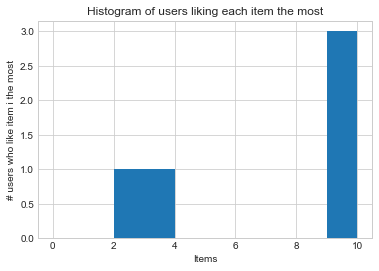

RECOMMENDER - Recommender system ready
RECOMMENDER - Num items: 10
RECOMMENDER - Users: 5
RECOMMENDER - Items per iter: 2
RECOMMENDER - Actual scores given by users (rows) to items (columns), unknown to system:
[[0.36 0.34 0.29 0.68 0.12 0.56 0.12 0.38 0.24 0.73]
 [0.39 0.11 0.34 0.53 0.09 0.44 0.17 0.26 0.47 0.59]
 [0.29 0.34 0.47 0.65 0.03 0.62 0.24 0.54 0.30 0.59]
 [0.22 0.31 0.27 0.46 0.07 0.39 0.07 0.41 0.36 0.62]
 [0.31 0.12 0.71 0.47 0.02 0.45 0.16 0.22 0.31 0.45]]
RECOMMENDER - Type of recommendation system: content
RECOMMENDER - Num attributes: 10
RECOMMENDER - Attributes of each item (rows):
[[1.00 0.00 0.00 0.00 1.00 1.00 0.00 0.00 0.00 0.00]
 [0.00 1.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00]
 [0.00 0.00 1.00 1.00 1.00 0.00 0.00 0.00 1.00 1.00]
 [0.00 1.00 0.00 1.00 1.00 1.00 1.00 0.00 0.00 0.00]
 [0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 1.00 1.00 1.00 1.00 0.00 0.00 0.00]
 [0.00 0.00 1.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [1.00 0.00 1.00 0.0

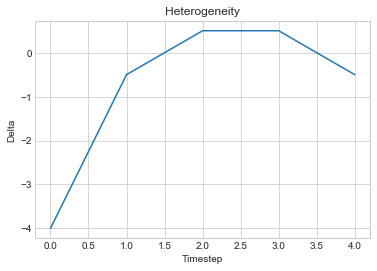

In [4]:
# Create recsys instance
if rec_args[RECSYS_TYPE] is None:
    rec = rec_dict[RECSYS_TYPE](NUM_USERS, NUM_ITEMS,
        num_items_per_iter=NUM_ITEMS_PER_ITER, randomize_recommended=True, actual_user_scores=True,
        debugger=debugger)
else:
    rec = rec_dict[RECSYS_TYPE](NUM_USERS, NUM_ITEMS,
        num_items_per_iter=NUM_ITEMS_PER_ITER, randomize_recommended=True, actual_user_scores=True, 
        debugger=debugger, **rec_args[RECSYS_TYPE])

# Startup
rec.startup_and_train(timesteps=STARTUP_TIMESTEPS)

# Runtime
rec.run(timesteps=RUN_TIMESTEPS, train_between_steps=True, measurement_visualization_rule=lambda x: x % 50 == 0)
 # lambda function
delta_t = rec.get_heterogeneity()

In [6]:
# Run for a single step
rec.run(timesteps=100, train_between_steps=True, measurement_visualization_rule=lambda x: x % 50 == 0)

RECOMMENDER - Run -- interleave recommendations and random items from now on
RECOMMENDER - Step 0
RECOMMENDER - Indices_prime:
[]


Not enough items left!


AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
# Check heterogeneity again
delta_t = rec.get_heterogeneity()